# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 9s 20ms/step - loss: 0.6284 - accuracy: 0.8101 - val_loss: 0.3090 - val_accuracy: 0.9048
Epoch 2/2
375/375 [==============================] - 8s 20ms/step - loss: 0.2542 - accuracy: 0.9198 - val_loss: 0.2033 - val_accuracy: 0.9364
Epoch 1/2
375/375 [==============================] - 8s 20ms/step - loss: 0.2876 - accuracy: 0.9163 - val_loss: 0.1443 - val_accuracy: 0.9597
Epoch 2/2
375/375 [==============================] - 8s 21ms/step - loss: 0.1189 - accuracy: 0.9650 - val_loss: 0.1048 - val_accuracy: 0.9707


**Plotting a validation accuracy comparison**

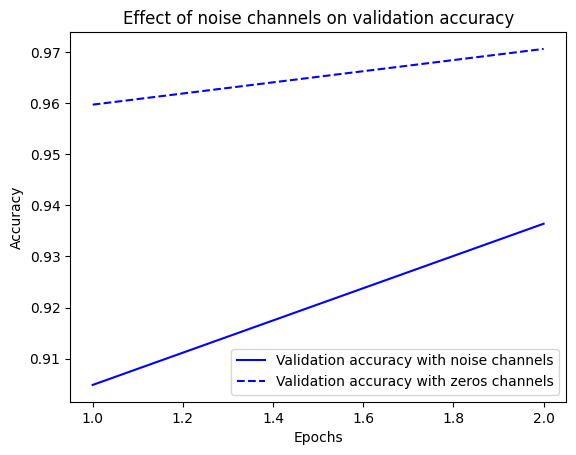

In [13]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 3)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [9]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 7s 14ms/step - loss: 2.3172 - accuracy: 0.1020 - val_loss: 2.3111 - val_accuracy: 0.1028
Epoch 2/2
375/375 [==============================] - 5s 13ms/step - loss: 2.3003 - accuracy: 0.1140 - val_loss: 2.3110 - val_accuracy: 0.1028


#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [10]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 6s 14ms/step - loss: 1123.8705 - accuracy: 0.4598 - val_loss: 2.7004 - val_accuracy: 0.4257
Epoch 2/2
375/375 [==============================] - 5s 13ms/step - loss: 7.5686 - accuracy: 0.3427 - val_loss: 2.4621 - val_accuracy: 0.3980


**The same model with a more appropriate learning rate**

In [11]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 6s 14ms/step - loss: 0.3688 - accuracy: 0.9100 - val_loss: 0.1601 - val_accuracy: 0.9571
Epoch 2/2
375/375 [==============================] - 5s 13ms/step - loss: 0.1463 - accuracy: 0.9631 - val_loss: 0.2083 - val_accuracy: 0.9523


### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [16]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 2s 5ms/step - loss: 0.6635 - accuracy: 0.8334 - val_loss: 0.3609 - val_accuracy: 0.9017
Epoch 2/2
375/375 [==============================] - 2s 4ms/step - loss: 0.3527 - accuracy: 0.9024 - val_loss: 0.3076 - val_accuracy: 0.9166


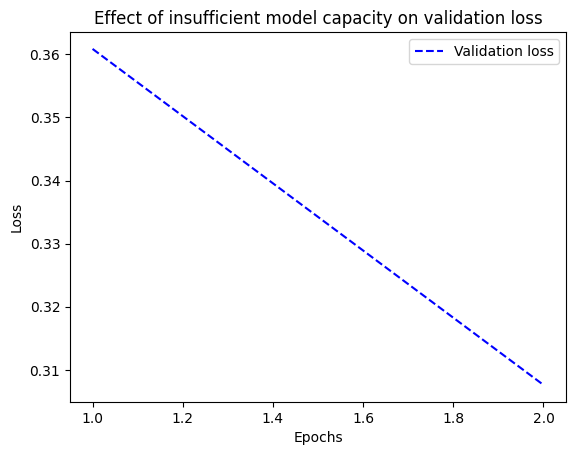

In [17]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 3)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [19]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 4s 7ms/step - loss: 0.3620 - accuracy: 0.8996 - val_loss: 0.1908 - val_accuracy: 0.9453
Epoch 2/2
375/375 [==============================] - 2s 6ms/step - loss: 0.1574 - accuracy: 0.9537 - val_loss: 0.1253 - val_accuracy: 0.9628


## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [26]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 3s 48ms/step - loss: 0.5168 - accuracy: 0.7829 - val_loss: 0.3937 - val_accuracy: 0.8661
Epoch 2/2
30/30 [==============================] - 1s 26ms/step - loss: 0.3078 - accuracy: 0.9007 - val_loss: 0.3229 - val_accuracy: 0.8737


**Version of the model with lower capacity**

In [27]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 3s 54ms/step - loss: 0.5679 - accuracy: 0.7603 - val_loss: 0.4644 - val_accuracy: 0.8567
Epoch 2/2
30/30 [==============================] - 1s 30ms/step - loss: 0.3916 - accuracy: 0.8862 - val_loss: 0.3690 - val_accuracy: 0.8778


**Version of the model with higher capacity**

In [28]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 8s 213ms/step - loss: 0.5503 - accuracy: 0.7455 - val_loss: 0.3043 - val_accuracy: 0.8758
Epoch 2/2
30/30 [==============================] - 6s 216ms/step - loss: 0.2680 - accuracy: 0.8936 - val_loss: 0.3366 - val_accuracy: 0.8521


#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [24]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [25]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 5s 64ms/step - loss: 0.6203 - accuracy: 0.6616 - val_loss: 0.4919 - val_accuracy: 0.8536
Epoch 2/2
30/30 [==============================] - 1s 25ms/step - loss: 0.4839 - accuracy: 0.7957 - val_loss: 0.3720 - val_accuracy: 0.8750
